<h4>Install prophet + plotly for interactive plotting (interactive plots are laggy)

In [1]:
!pip install prophet

In [2]:
!pip install plotly

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

f2021 = "../IT-NO_2021_hourly.csv"
f2022 = "../IT-NO_2022_hourly.csv"
f2023 = "../IT-NO_2023_hourly.csv"

dataset1 = pd.read_csv(f2021)
dataset2 = pd.read_csv(f2022)
dataset3 = pd.read_csv(f2023)

In [4]:
# Data concatenation of carbon intensity:
dataset_CI = pd.concat([dataset1, dataset2, dataset3], axis=0)

dataset_CI['Datetime (UTC)'] = pd.to_datetime(dataset_CI['Datetime (UTC)'])
dataset_CI.rename(columns={'Datetime (UTC)': 'timestamp'}, inplace=True) # Column renaming
dataset_CI.set_index('timestamp', inplace=True)

dataset_CI.drop(columns=['Country', 'Zone Name', 'Zone Id', 'Data Source', 'Data Estimated', 'Data Estimation Method', 'Low Carbon Percentage', 'Renewable Percentage'], inplace=True)
dataset_CI['LCA+direct'] = dataset_CI['Carbon Intensity gCO₂eq/kWh (LCA)'] + dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)']
dataset_CI

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),LCA+direct
timestamp,,,
2021-01-01 00:00:00,303.29,389.74,693.03
2021-01-01 01:00:00,303.45,387.76,691.21
2021-01-01 02:00:00,295.04,377.86,672.90
2021-01-01 03:00:00,295.56,380.36,675.92
2021-01-01 04:00:00,308.06,394.66,702.72
...,...,...,...
2023-12-31 19:00:00,260.51,333.72,594.23
2023-12-31 20:00:00,265.88,342.93,608.81
2023-12-31 21:00:00,250.60,324.02,574.62


In [5]:
dataset_CI.drop(columns=['Carbon Intensity gCO₂eq/kWh (direct)', 'Carbon Intensity gCO₂eq/kWh (LCA)'], inplace=True)
dataset_CI

,LCA+direct
timestamp,
2021-01-01 00:00:00,693.03
2021-01-01 01:00:00,691.21
2021-01-01 02:00:00,672.90
2021-01-01 03:00:00,675.92
2021-01-01 04:00:00,702.72
...,...
2023-12-31 19:00:00,594.23
2023-12-31 20:00:00,608.81
2023-12-31 21:00:00,574.62


Testing propher on LCA+direct datapoints. documentation: https://facebook.github.io/prophet/docs/quick_start.html#python-api
 

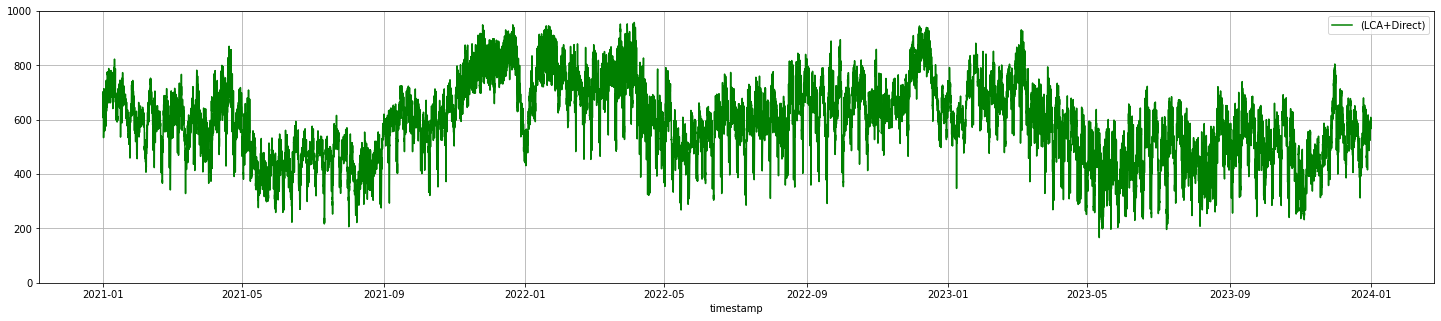

In [6]:
# Plotting and comparison od the different CI values
x = dataset_CI.index
y = dataset_CI['LCA+direct']

# Create subplots with shared X-axis
fig, ax1 = plt.subplots(1, 1, figsize=(25, 5), sharex=True)

# Plot data on each subplot

ax1.grid(True)
ax1.plot(x, y, 'g', label='(LCA+Direct)')
ax1.set_ylim(0, 1000)
ax1.set_xlabel('timestamp')

# Add legends

ax1.legend()

# Show the plot
plt.show()


Preparing the dataframe as required by the propher documentation:

In [7]:
dataset_CI

,LCA+direct
timestamp,
2021-01-01 00:00:00,693.03
2021-01-01 01:00:00,691.21
2021-01-01 02:00:00,672.90
2021-01-01 03:00:00,675.92
2021-01-01 04:00:00,702.72
...,...
2023-12-31 19:00:00,594.23
2023-12-31 20:00:00,608.81
2023-12-31 21:00:00,574.62


In [8]:
dataset_CI_fix = dataset_CI.reset_index()
dataset_CI_fix

,timestamp,LCA+direct
0,2021-01-01 00:00:00,693.03
1,2021-01-01 01:00:00,691.21
2,2021-01-01 02:00:00,672.90
3,2021-01-01 03:00:00,675.92
4,2021-01-01 04:00:00,702.72
...,...,...
26275,2023-12-31 19:00:00,594.23
26276,2023-12-31 20:00:00,608.81
26277,2023-12-31 21:00:00,574.62
26278,2023-12-31 22:00:00,597.98


In [9]:
dataset_CI_fix.rename(columns={'timestamp':'ds', 'LCA+direct':'y' }, inplace=True)
dataset_CI_fix

,ds,y
0,2021-01-01 00:00:00,693.03
1,2021-01-01 01:00:00,691.21
2,2021-01-01 02:00:00,672.90
3,2021-01-01 03:00:00,675.92
4,2021-01-01 04:00:00,702.72
...,...,...
26275,2023-12-31 19:00:00,594.23
26276,2023-12-31 20:00:00,608.81
26277,2023-12-31 21:00:00,574.62
26278,2023-12-31 22:00:00,597.98


Creating another dataset with data only before 2023-01, to predict 2023 and see the performance and compare

In [10]:
dataset_half = dataset_CI_fix[(dataset_CI_fix['ds'] < '2023-01')]

In [11]:
dataset_half

,ds,y
0,2021-01-01 00:00:00,693.03
1,2021-01-01 01:00:00,691.21
2,2021-01-01 02:00:00,672.90
3,2021-01-01 03:00:00,675.92
4,2021-01-01 04:00:00,702.72
...,...,...
17515,2022-12-31 19:00:00,743.33
17516,2022-12-31 20:00:00,733.81
17517,2022-12-31 21:00:00,742.13
17518,2022-12-31 22:00:00,739.83


Performing prediction with Prophet:

13:26:25 - cmdstanpy - INFO - Chain [1] start processing
13:26:42 - cmdstanpy - INFO - Chain [1] done processing


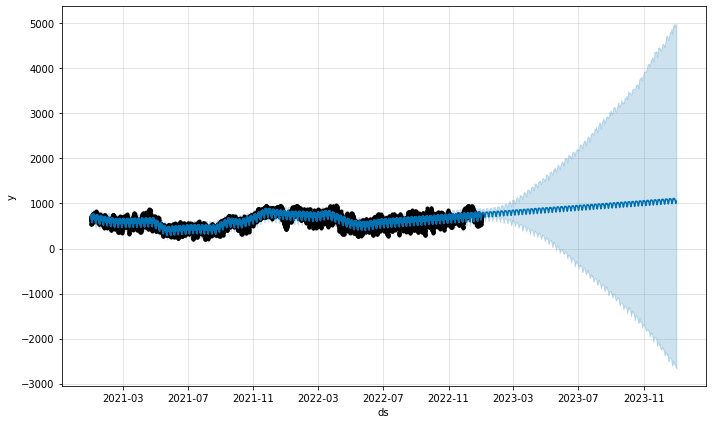

In [12]:
m_noparams = Prophet()
m_noparams.fit(dataset_half)

future = m_noparams.make_future_dataframe(periods=365)
future.tail()

forecast_noparams = m_noparams.predict(future)
forecast_noparams[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m_noparams.plot(forecast_noparams)

Trying to adjust parameters to consider seasonalities:

13:26:47 - cmdstanpy - INFO - Chain [1] start processing
13:27:09 - cmdstanpy - INFO - Chain [1] done processing


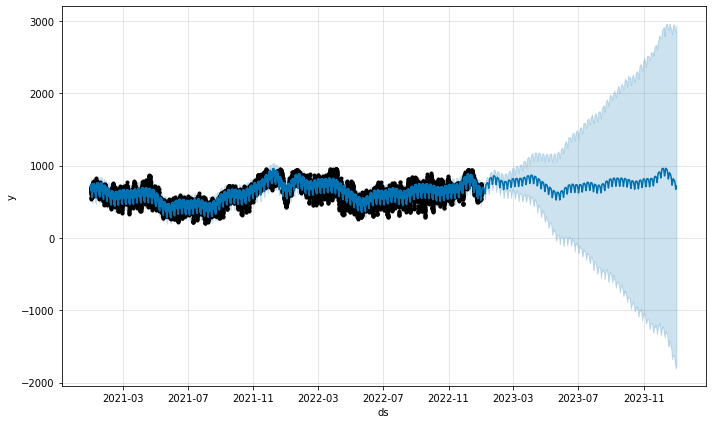

In [13]:
m = Prophet(yearly_seasonality = True, weekly_seasonality=True, daily_seasonality=True) # forcing to consider seasonality
m.fit(dataset_half)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

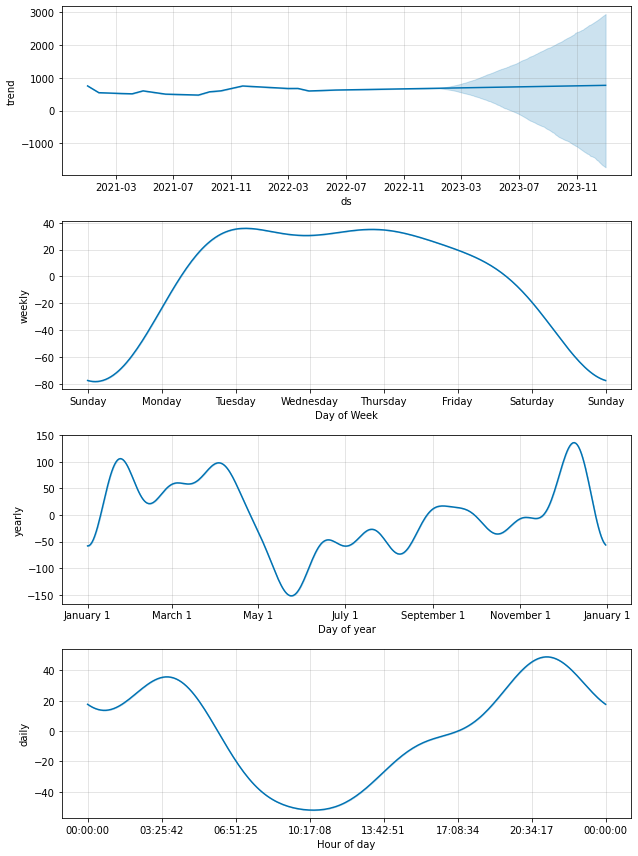

In [14]:
fig2 = m.plot_components(forecast)

Now, looks better! Comparing with real data:

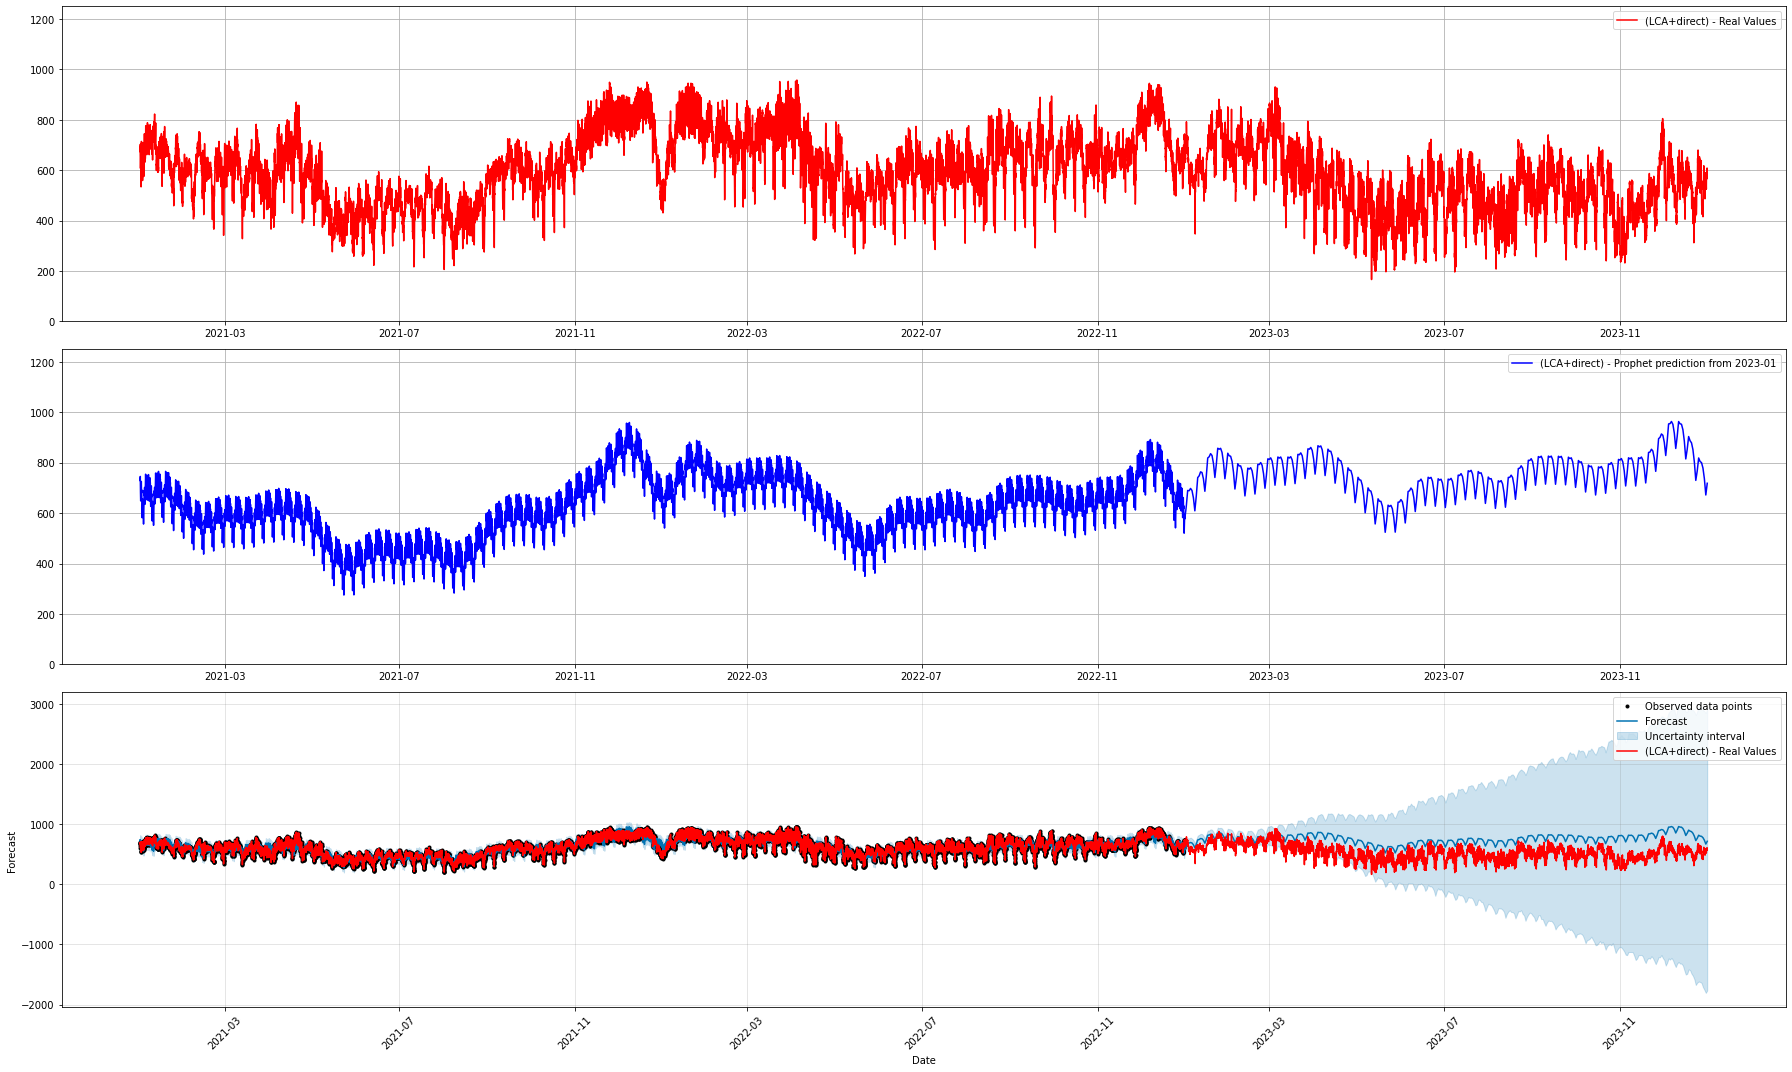

In [15]:
# datapoints:
x1 = dataset_CI.index
y1 = dataset_CI['LCA+direct']
x2 = forecast['ds']
y2 = forecast['yhat']

fig = plt.figure(figsize=(25, 15))  # Adjust the figure size as needed

# Create the first subplot
ax1 = fig.add_subplot(3, 1, 1)  # This will be the first subplot (3 rows, 1 column, first plot)
ax1.grid(True)
ax1.plot(x1, y1, 'red', label = '(LCA+direct) - Real Values')
ax1.set_ylim(0, 1250)

# Create the second subplot
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)  # This will be the second subplot
ax2.grid(True)
ax2.plot(x2, y2, 'blue', label = '(LCA+direct) - Prophet prediction from 2023-01')
ax2.set_ylim(0, 1250)

# Create the third subplot for Prophet's plot
ax3 = fig.add_subplot(3, 1, 3, sharex=ax1)  # This will be the third subplot
fig1 = m.plot(forecast, ax=ax3)  # Plot the forecast on the third subplot

ax3.plot(x1, y1, 'red', label = '(LCA+direct) - Real Values')

ax3.set_xlabel('Date')  # Set the x-axis label
ax3.set_ylabel('Forecast')  # Set the y-axis label
ax3.tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels for better readability

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()  # Adjust the layout so that plots do not overlap
plt.show()  # Display the figure

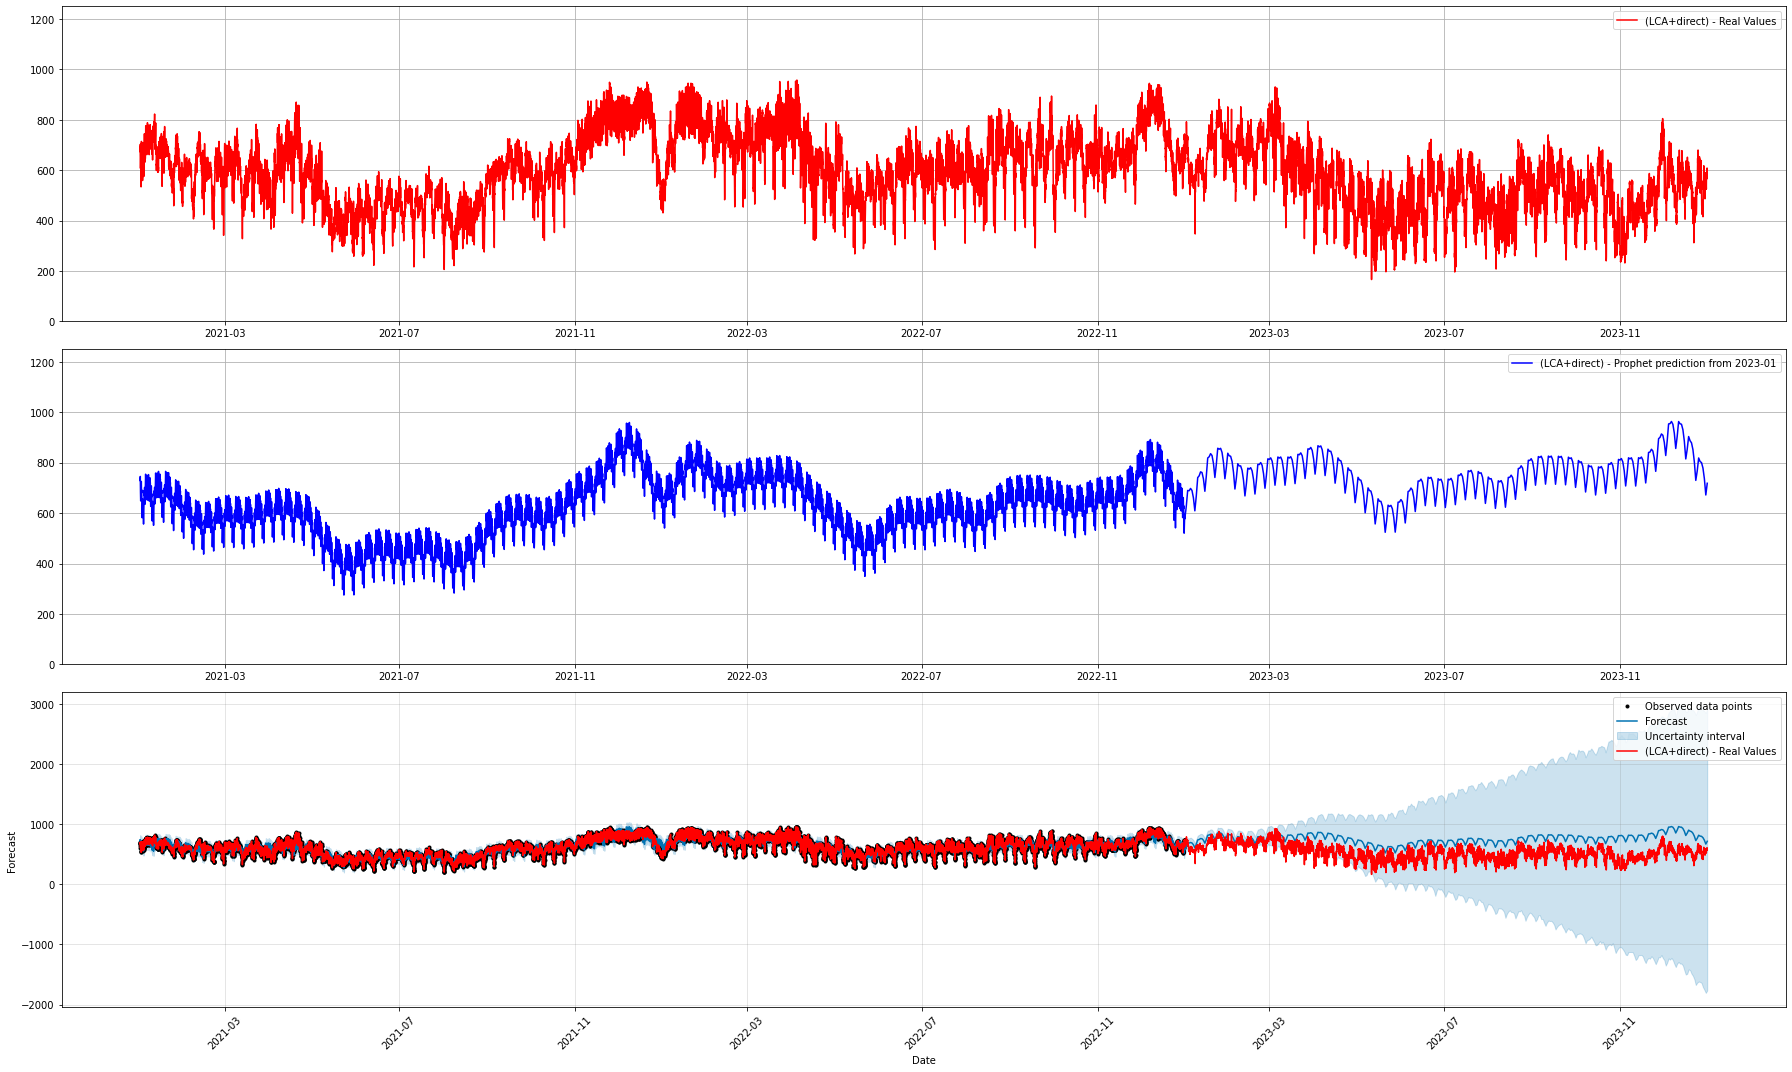

In [31]:
# datapoints:
x1 = dataset_CI.index
y1 = dataset_CI['LCA+direct']
x2 = forecast['ds']
y2 = forecast['yhat']

fig = plt.figure(figsize=(25, 15))  # Adjust the figure size as needed

# Create the first subplot
ax1 = fig.add_subplot(3, 1, 1)  # This will be the first subplot (3 rows, 1 column, first plot)
ax1.grid(True)
ax1.plot(x1, y1, 'red', label = '(LCA+direct) - Real Values')
ax1.set_ylim(0, 1250)

# Create the second subplot
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)  # This will be the second subplot
ax2.grid(True)
ax2.plot(x2, y2, 'blue', label = '(LCA+direct) - Prophet prediction from 2023-01')
ax2.set_ylim(0, 1250)

# Create the third subplot for Prophet's plot
ax3 = fig.add_subplot(3, 1, 3, sharex=ax1)  # This will be the third subplot
fig1 = m.plot(forecast, ax=ax3)  # Plot the forecast on the third subplot

ax3.plot(x1, y1, 'red', label = '(LCA+direct) - Real Values')

ax3.set_xlabel('Date')  # Set the x-axis label
ax3.set_ylabel('Forecast')  # Set the y-axis label
ax3.tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels for better readability

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()  # Adjust the layout so that plots do not overlap
plt.show()  # Display the figure